In [ ]:
#review: 대출 예측문제 
>> variable


In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

import os 
os.getcwd()
os.chdir('C:\\Users\\jangs\\archive')

In [49]:
loan = pd.read_csv('loan.csv') #파일 형태가 csv, 연결 프로그램 execl >> ques; execl읽는 방법
#결측치 처리및 인코딩;
loan.set_index('Loan_ID', inplace=True) #고유값; encoding 대안: loan_id를 index로 변환

In [50]:
loan.shape

(614, 12)

In [51]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [52]:
loan.isna().sum() #결측치 조사 

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
loan.dtypes #(없이 사용) >> 인코딩이 필요한 부분 확인 

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [54]:
loan.describe() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [55]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 결측치 처리

In [ ]:
#결측치 처리 : 가능한 통계 영향이 적은값을 대입하는 것이 중요
#게량 데이터 >> 평균값을 이용
#범주 데이터 >> 빈도를 이용하여 
# >>>> 최빈수 대입 : from scipy.stats  import mode
#loanamount 분포를 확인, 평균 or 중윗수 대입

# 범주형 변수 널값 한꺼번에 처리 
from scipy.stats import mode
col_lst = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']
for col in col_lst:
    loan[col].fillna(mode(loan[col]).mode[0], inplace=True)
    
#loan['Gender'].isna().sum()
#error 값
#mode(loan['Gender']).mode #해당 컬럼에서 빈도가 많은 데이터를 넘겨줌, 데이터 array형으로 나와서 선택해야함


#loan[Gender].fillna(mode((loan[Gender]).mode[0]), inplace=True)
#loan[Gender].isna().sum()


In [59]:
# 범주형 변수의 널값 제거후 널값 확인
loan.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

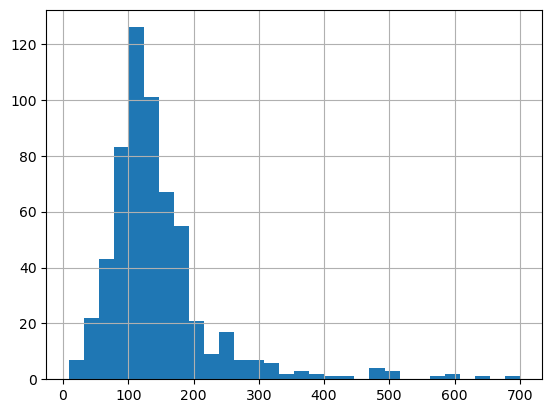

In [60]:
# 계량형 변수는 분포를 확인 후에 결측치 처리방법 결정
loan.LoanAmount.hist(bins=30)
plt.show()

In [61]:
#한쪽으로 치우쳐친 데이터 >> '중윗수로 대체 ' : 데이터 정렬 / 가운데 순서의 데이터
loan.LoanAmount.fillna(loan.LoanAmount.median(), inplace=True)
loan.LoanAmount.median()

128.0

In [62]:
loan.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 인코딩

In [75]:
#인코딩 전에 파일 복사 
loan_src = loan.copy()

#object 이름 추출
loan.dtypes == 'object' #object형 데이터만 TRUE 
col_lst2 = loan.columns[loan.dtypes == 'object'] #object형 데이터만 column으로 추출 



In [ ]:
# 인코딩
from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#loan['Gender'] = le.fit_transform(loan['Gender'])
#loan['Gender']

# 범주 데이터 한번에 인코딩하기: 컬럼데이터 추출하여 반복문 돌리기 idea >> 'col_lst2'
for col in col_lst2:
    le = LabelEncoder()
    loan[col] = le.fit_transform(loan[col])
    
loan.dtypes

# 사전분석 

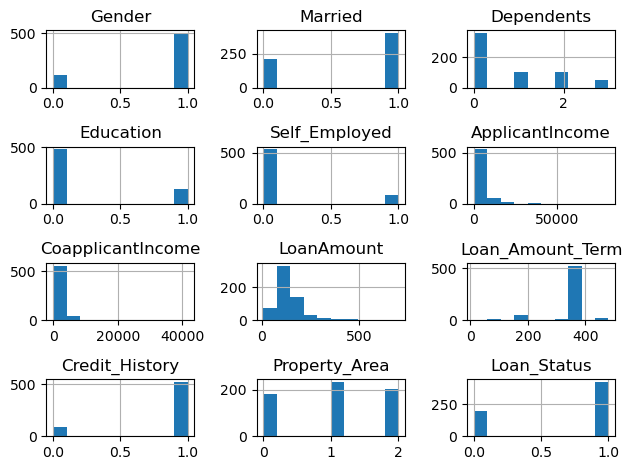

In [79]:
#히스토그램
loan.hist()
plt.tight_layout()
plt.show()

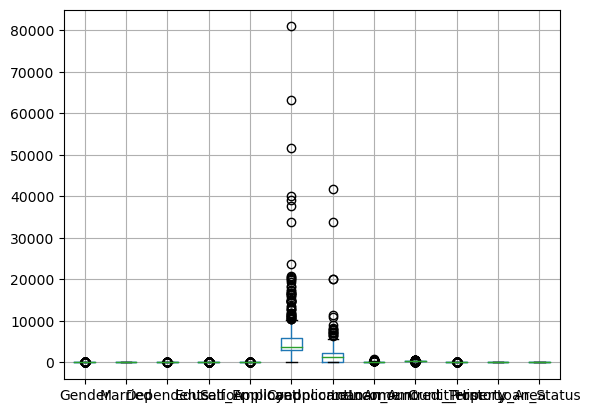

In [80]:
#box-plot ; scailing 여부 확인 
loan.boxplot() #scaling 필요
plt.show()

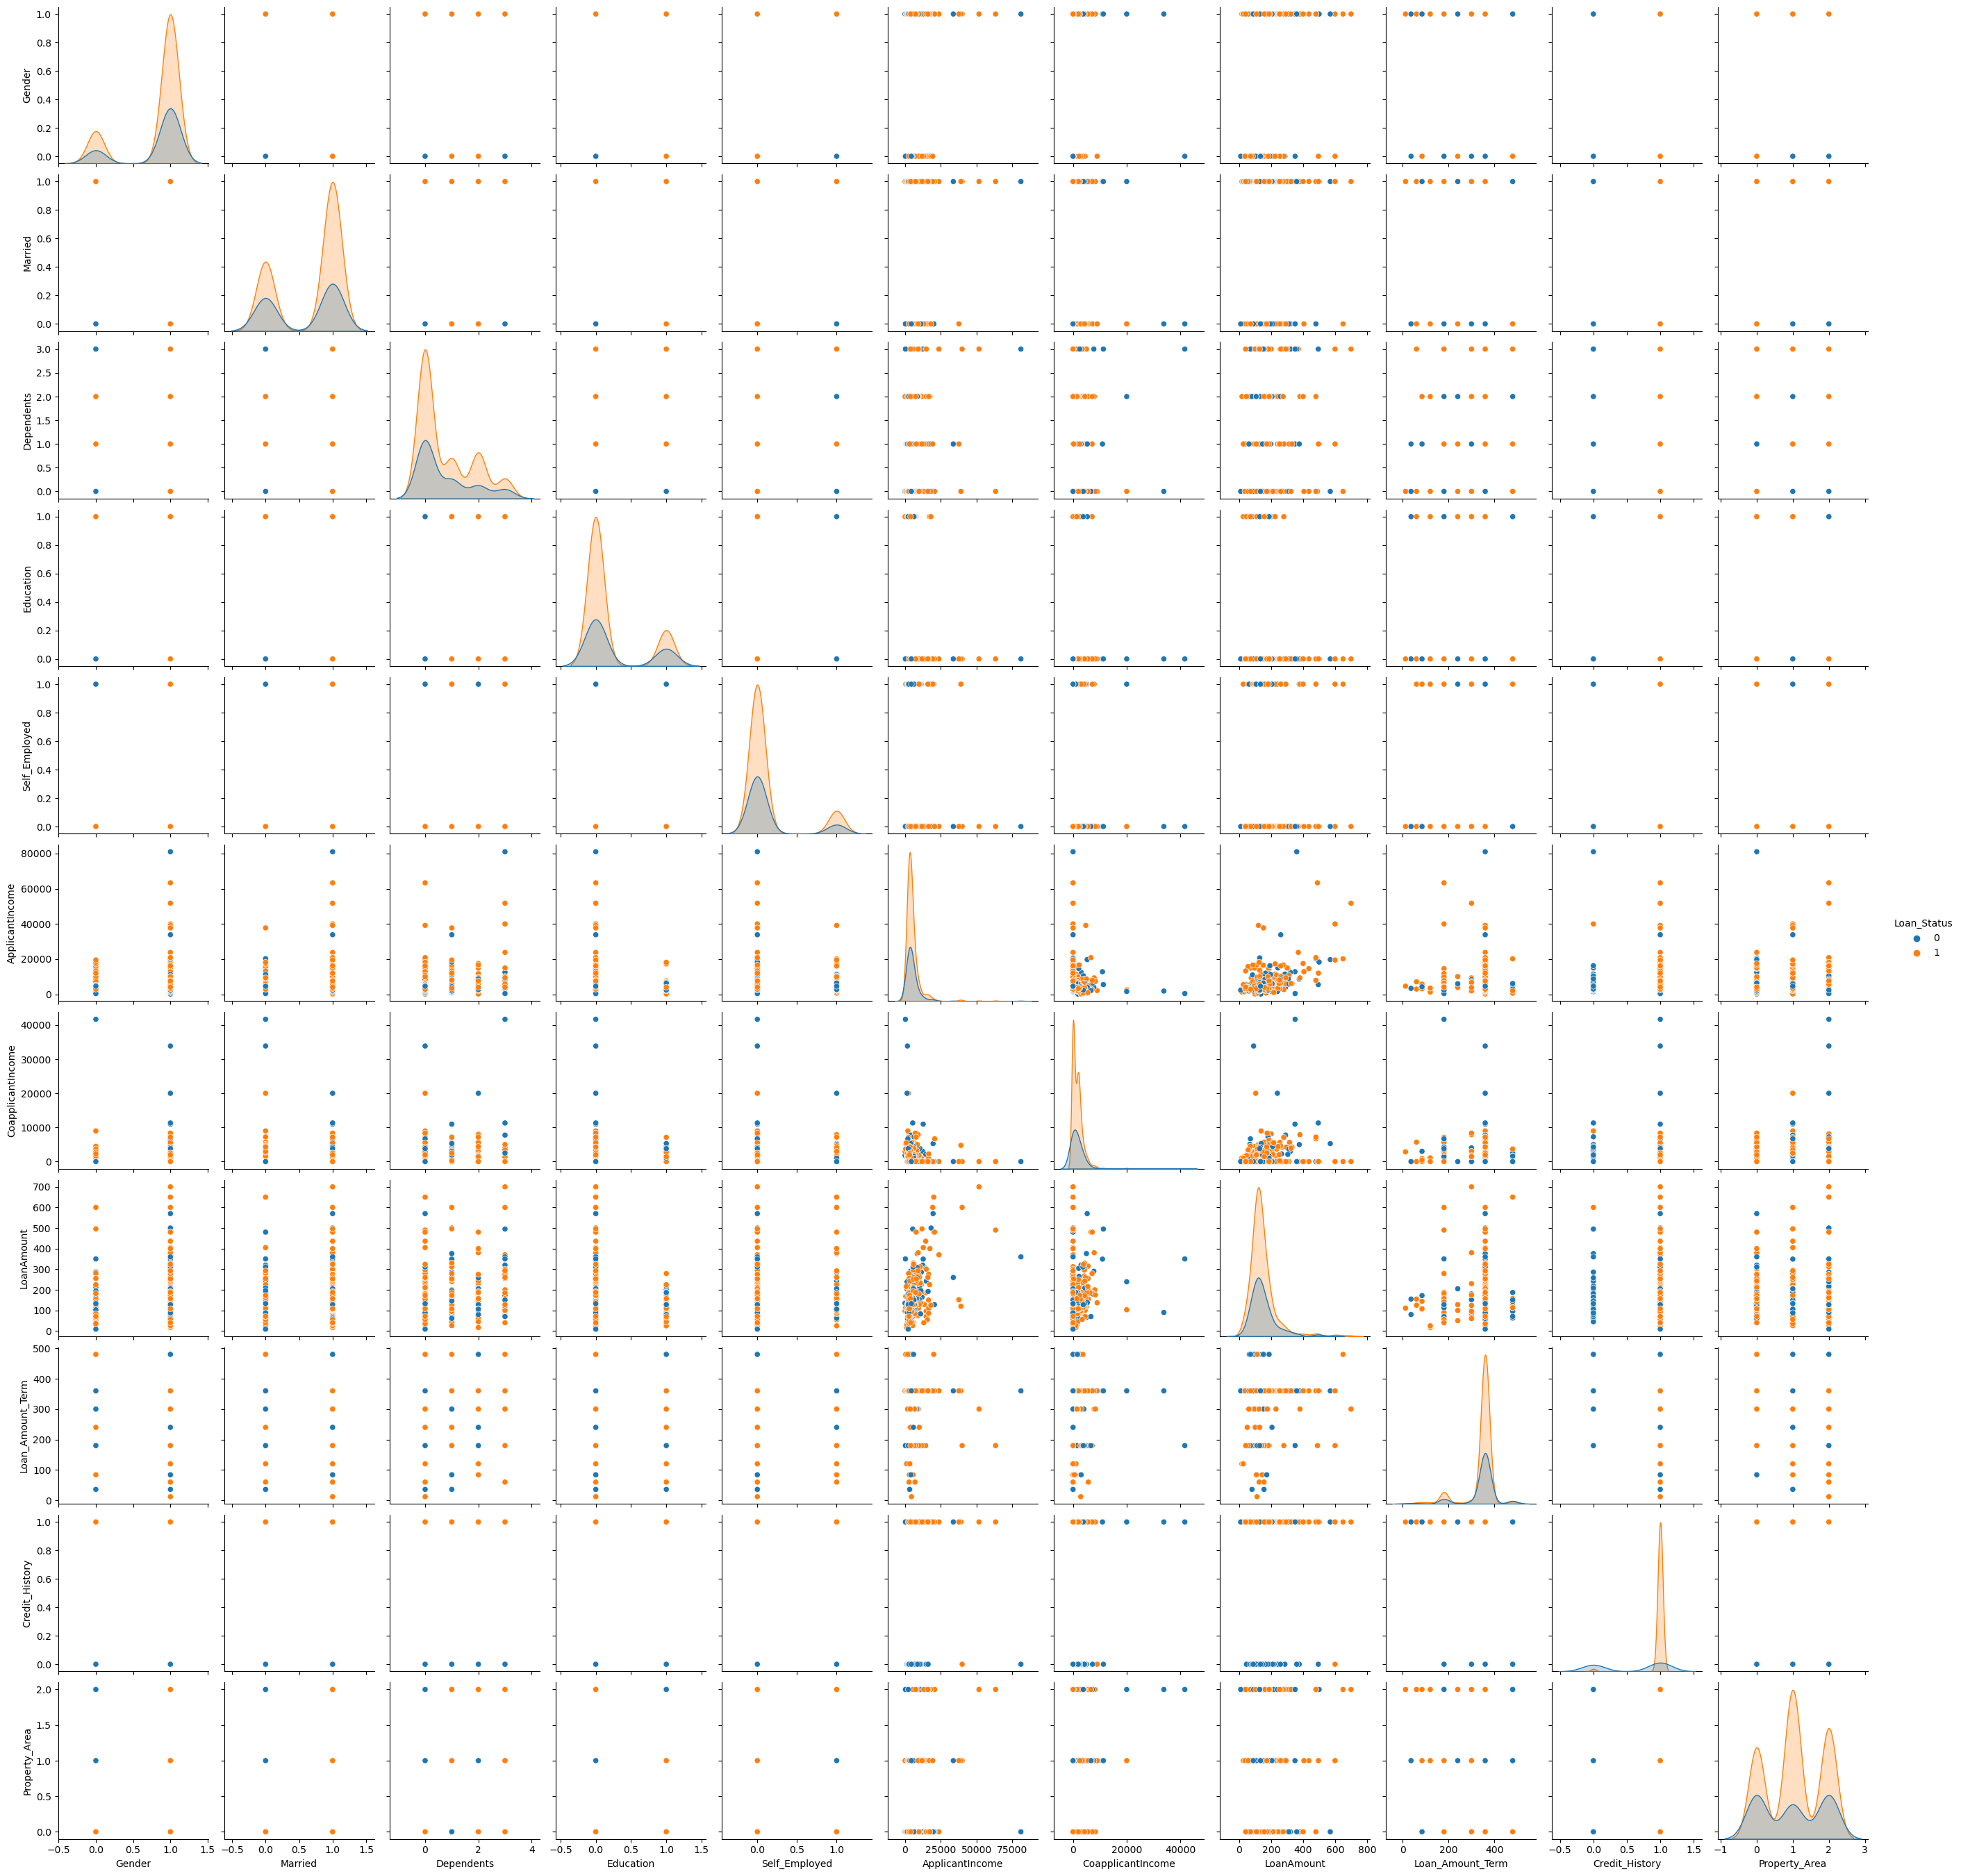

In [81]:
#변수들 사이의 상관관게 : importance 예측
sns.pairplot(loan, hue='Loan_Status')
plt.show()

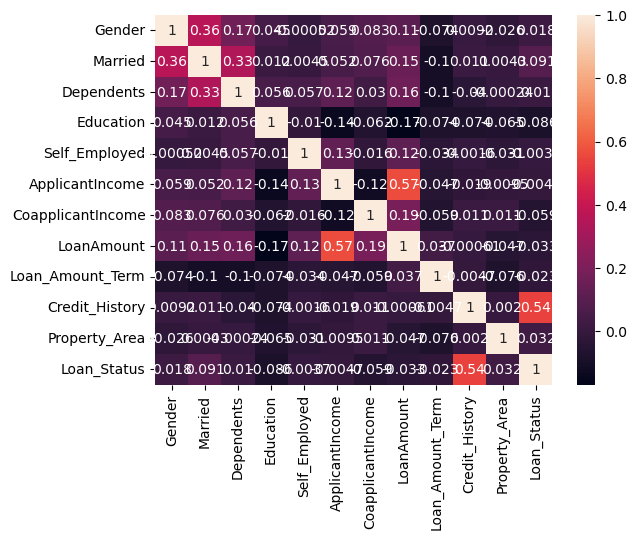

In [82]:
sns.heatmap(loan.corr(), annot=True)
plt.show()

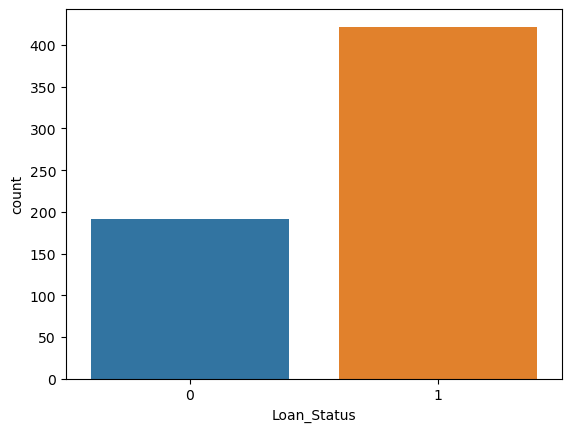

In [89]:
# resample 여부 확인 
sns.countplot(x=loan.Loan_Status)
plt.show()

# x, y split (독립, 종속 변수 변경)

In [102]:
y = loan.Loan_Status
x = loan.drop('Loan_Status', axis=1)

In [107]:
y

Loan_ID
LP001002    1
LP001003    0
LP001005    1
LP001006    1
LP001008    1
           ..
LP002978    1
LP002979    1
LP002983    1
LP002984    1
LP002990    0
Name: Loan_Status, Length: 614, dtype: int64

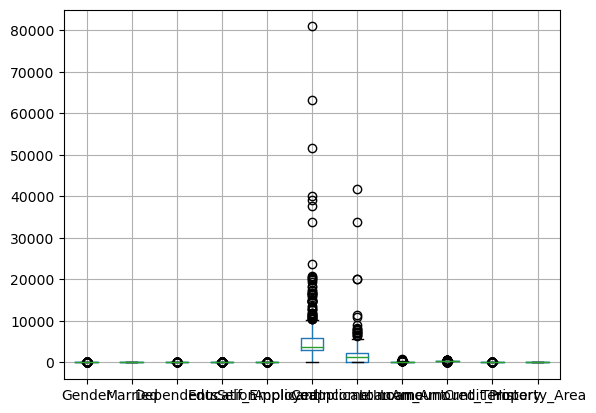

In [91]:
#X값 스케일링 MinMaxScaler
x.boxplot() #스케일링전에 범주확인 
plt.show()

# 스케일링 

In [ ]:
# x값 스케일링 이후 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

plt.boxplot(x_scaled)
plt.show()

In [ ]:
#•Train and test split 훈련, 테스트데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x_scaled, y, test_size=.2, random_state=3)  #autocompletion; Jupiter에서는 'tab'
y_train


# Resample 

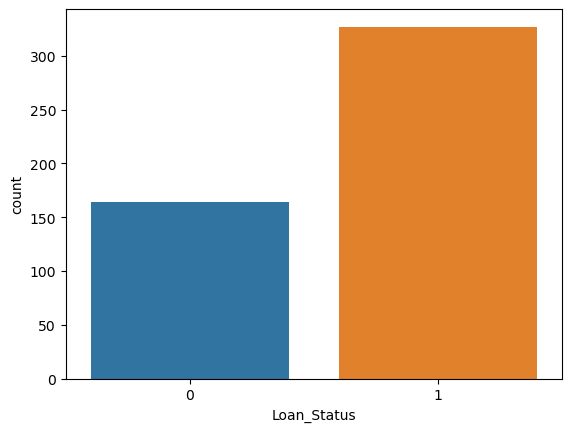

In [110]:
# resample 
sns.countplot(x= y_train) #x/ version에 의해서 x축 지정해야 분리된 값이 출력
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_train, y_train)

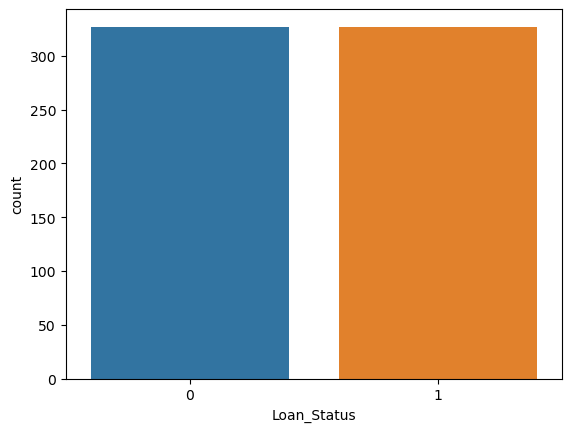

In [115]:
sns.countplot(x=y_smote)
plt.show()

# Model Trainig (log, Dt, Rf)

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#모델 학습 
log_model = LogisticRegression() #학습에 랜덤한 부분이 있음? log_model = LogisticRegression(random_state=1) 고정? 
log_model.fit(x_smote, y_smote)

# Model 평가 

In [118]:
log_model.score(x_test, y_test)

0.8617886178861789

# 교차 검증

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_model, x_test, y_test, cv=10, scoring='accuracy')

In [127]:
cross_val_score(log_model, x_test, y_test, cv=10, scoring='accuracy').mean()

0.8615384615384615

# Model별로 정확도 비교

In [134]:
model_lst = [LogisticRegression (), DecisionTreeClassifier(), RandomForestClassifier()]
score_lst= [] # 분석 방법별 정확도 값 저장
cv_lst = [] # 분석 방법별 교차검증 평균값 저장 

for model in model_lst: 
    model.fit(x_smote, y_smote)
    score_lst.append(model.score(x_test, y_test))
    cv_lst.append(cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy'))
    
print(score_lst)
print(cv_lst)

[0.8617886178861789, 0.6991869918699187, 0.7967479674796748]
[array([0.84615385, 0.84615385, 0.92307692, 0.83333333, 1.        ,
       0.91666667, 0.83333333, 0.66666667, 1.        , 0.75      ]), array([0.84615385, 0.84615385, 0.76923077, 0.75      , 0.75      ,
       0.83333333, 0.83333333, 0.66666667, 0.66666667, 0.66666667]), array([0.84615385, 0.84615385, 0.92307692, 0.83333333, 0.91666667,
       0.83333333, 0.83333333, 0.66666667, 1.        , 0.75      ])]


In [131]:
print('정확도 비교')
ac = pd.DataFrame(score_lst, index=['Log', 'Dt', 'Rf'], columns=['Accuracy'])
ac

정확도 비교


,Accuracy
Log,0.861789
Dt,0.707317
Rf,0.796748


In [135]:
# cross 검증으로 비교 
cv_df = pd.DataFrame(cv_lst,  index=['Log', 'Dt', 'Rf'] ).T
cv_df

,Log,Dt,Rf
0,0.846154,0.846154,0.846154
1,0.846154,0.846154,0.846154
2,0.923077,0.769231,0.923077
3,0.833333,0.750000,0.833333
4,1.000000,0.750000,0.916667
5,0.916667,0.833333,0.833333
6,0.833333,0.833333,0.833333
7,0.666667,0.666667,0.666667
8,1.000000,0.666667,1.000000
9,0.750000,0.666667,0.750000


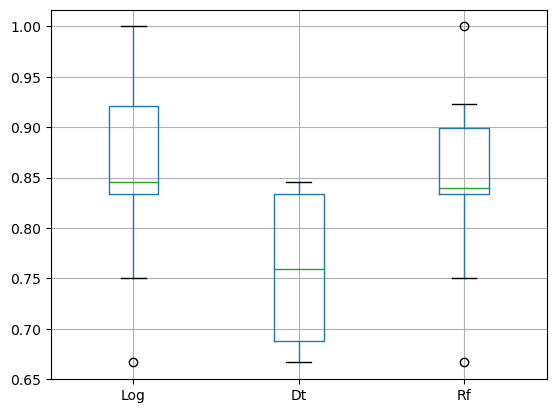

In [136]:
#box_plot 
cv_df.boxplot()
plt.show()

In [137]:
# 평균, 중윗수 
pd.DataFrame({
    'Mean': cv_df.mean(),
    'Std': cv_df.std()# mean: 클수록, std: 작을수록 : 데이터의 정확도 놑은 모델 
})

,Mean,Std
Log,0.861538,0.104163
Dt,0.762821,0.075967
Rf,0.844872,0.092193


# 다양한 데이터 검증 방법 
# confussion matrix, classification repor, roc curve

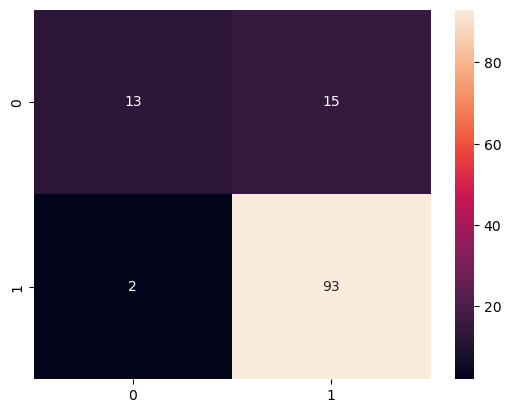

In [203]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

log_model = LogisticRegression()
log_model.fit(x_smote, y_smote)
y_pred = log_model.predict(x_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [142]:
#분류 리포트 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.46      0.60        28
           1       0.86      0.98      0.92        95

    accuracy                           0.86       123
   macro avg       0.86      0.72      0.76       123
weighted avg       0.86      0.86      0.85       123



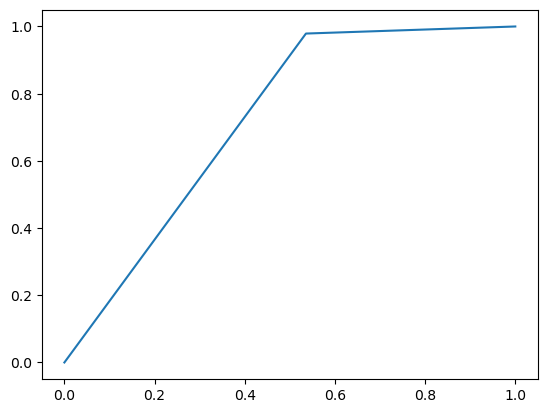

In [151]:
#락커브 
tpr, fpr, thres =  roc_curve(y_test, y_pred)
plt.plot(tpr, fpr)

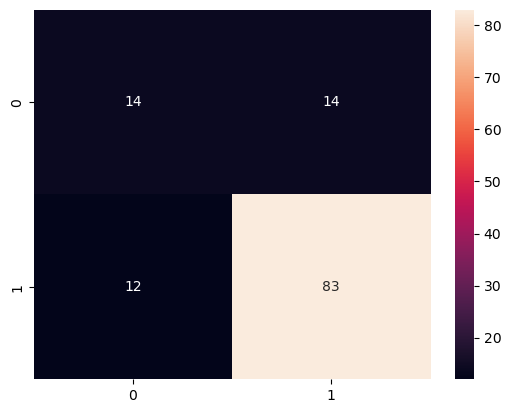

              precision    recall  f1-score   support

           0       0.54      0.50      0.52        28
           1       0.86      0.87      0.86        95

    accuracy                           0.79       123
   macro avg       0.70      0.69      0.69       123
weighted avg       0.78      0.79      0.79       123



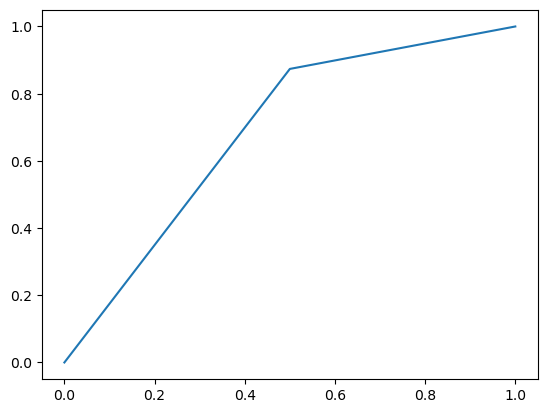

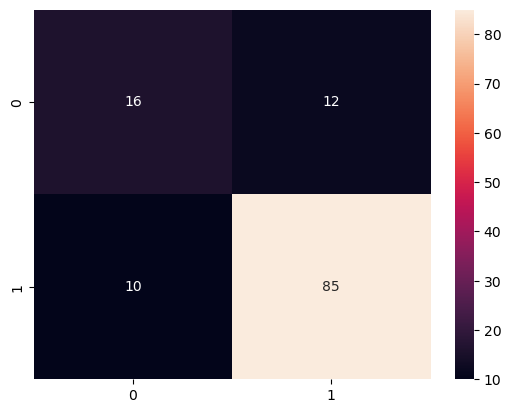

              precision    recall  f1-score   support

           0       0.62      0.57      0.59        28
           1       0.88      0.89      0.89        95

    accuracy                           0.82       123
   macro avg       0.75      0.73      0.74       123
weighted avg       0.82      0.82      0.82       123



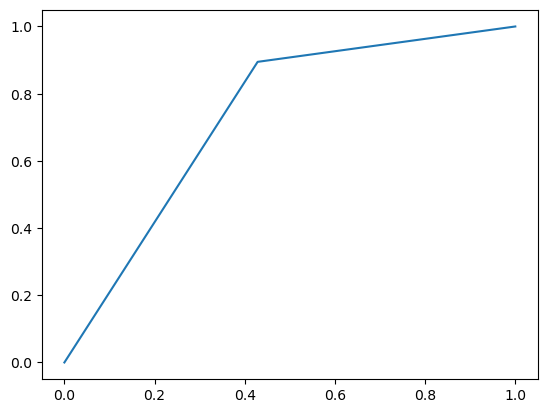

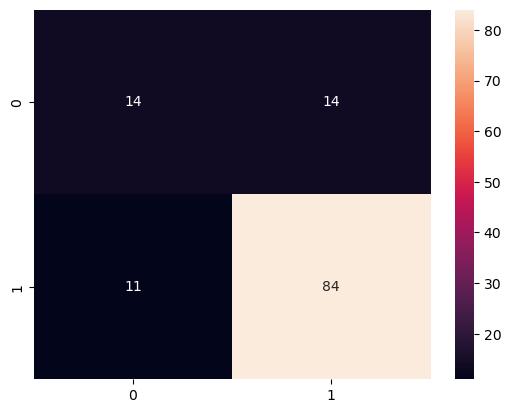

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        28
           1       0.86      0.88      0.87        95

    accuracy                           0.80       123
   macro avg       0.71      0.69      0.70       123
weighted avg       0.79      0.80      0.79       123



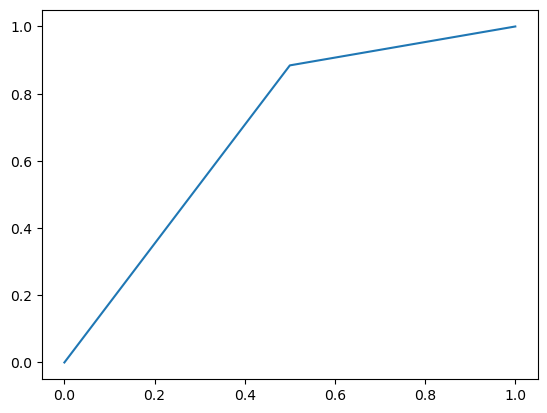

<Figure size 640x480 with 0 Axes>

In [158]:
#loop를 사용하여 3가지 방법을 표현 
for i in range(len(model_lst)):
    model.fit(x_smote, y_smote)
    y_pred = model.predict(x_test)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    plt.show()
    print(classification_report(y_test, y_pred))
    tpr, fpr, thres =  roc_curve(y_test, y_pred)
    plt.plot(tpr, fpr)
    plt.show() # 그래프 나누기 
    plt.tight_layout()


              precision    recall  f1-score   support

           0       0.56      0.54      0.55        28
           1       0.86      0.87      0.87        95

    accuracy                           0.80       123
   macro avg       0.71      0.70      0.71       123
weighted avg       0.79      0.80      0.80       123

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        28
           1       0.86      0.88      0.87        95

    accuracy                           0.80       123
   macro avg       0.71      0.69      0.70       123
weighted avg       0.79      0.80      0.79       123

              precision    recall  f1-score   support

           0       0.52      0.46      0.49        28
           1       0.85      0.87      0.86        95

    accuracy                           0.78       123
   macro avg       0.68      0.67      0.68       123
weighted avg       0.77      0.78      0.78       123



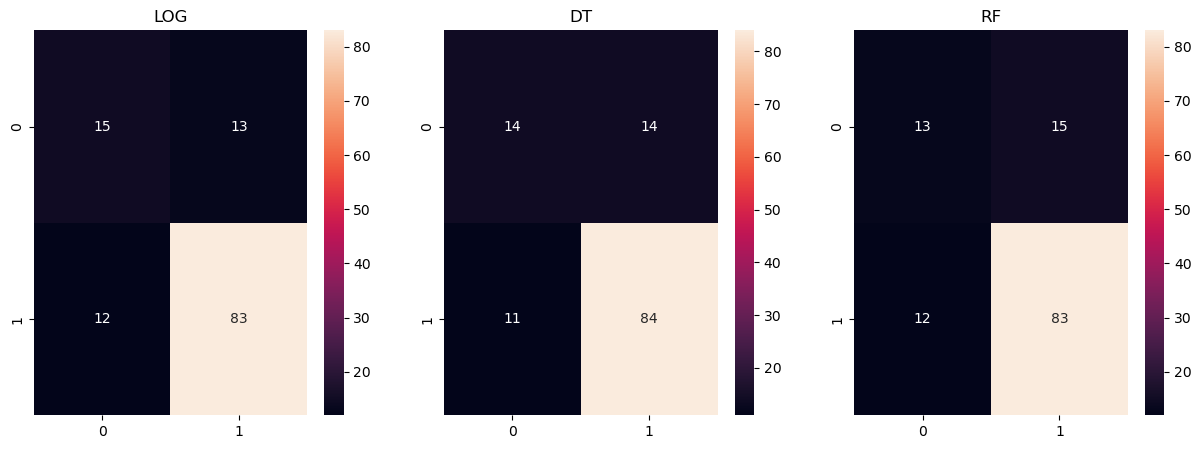

In [159]:
#영역 나누어 1장표에  표현해보기 
#>> subplot을 활용하여 표현  / plt.show() 이전에 선언하면 적용
model_names = ['LOG', 'DT', 'RF']
plt.figure(figsize=(15,5))# 전체 그림
for i in range(len(model_lst)):
    model.fit(x_smote, y_smote)
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))
    plt.subplot(1,3,i+1) # 그림 1 x 3 matrix; 
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    plt.title(model_names[i])
plt.show()

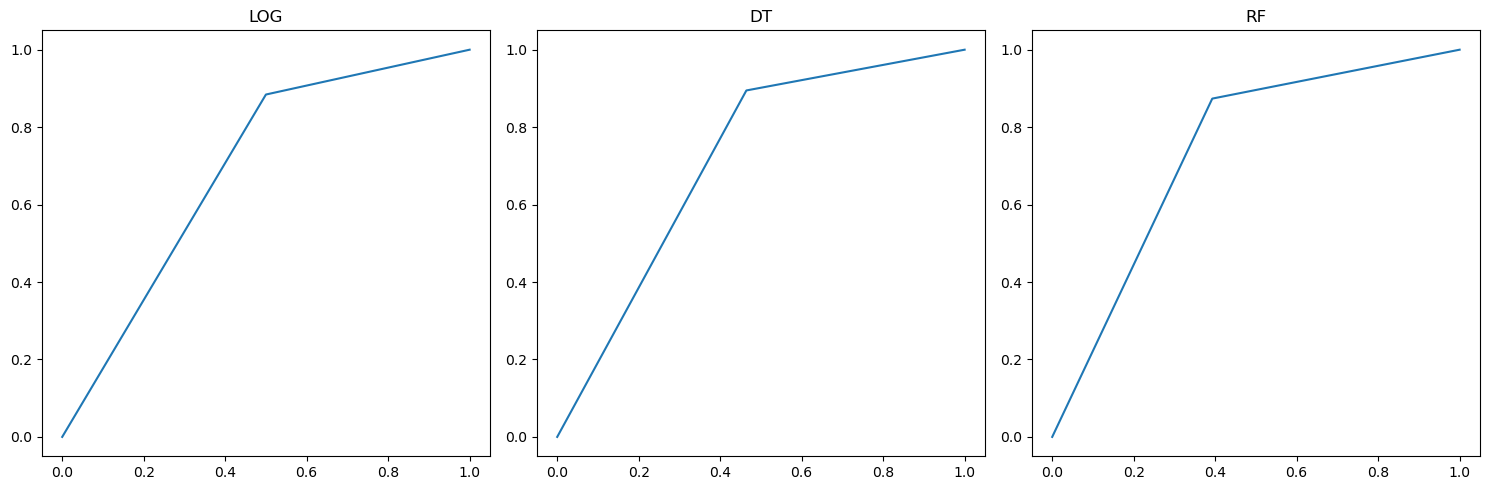

In [168]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5)) #무슨역할
for i in range(len(model_lst)):
    model.fit(x_smote, y_smote)
    y_pred = model.predict(x_test)
    fpr, tpr, thres = roc_curve(y_test, y_pred)
    axs[i].plot(fpr, tpr)
    axs[i].set_title(model_names[i]) 
    #plot_roc_curve(model, x_test, y_test, ax=axs[i], name=model_names[i])
       
plt.tight_layout()
plt.show()

# LDA 모델 활용법 

In [204]:
#연습용 데이터에서 파일 로딩
from sklearn import datasets
cancer = datasets.load_breast_cancer()

In [205]:
print(cancer.DESCR)
cancer

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [206]:
#데이터 프레임으로 만들기 
cancer_df = pd.DataFrame(cancer.data)
cancer_df.columns = cancer.feature_names
cancer_df['class'] = cancer.target #역할 다시! 찾아봐; 
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [207]:
#데이터 프레임 요약
cancer_df.shape

(569, 31)

In [208]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [209]:
cancer_df.groupby('class').size() #class: 암 환자 (양성/음성 여부) 

class
0    212
1    357
dtype: int64

In [210]:
#결측치 확인 
cancer_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
class                      0
dtype: int64

In [211]:
#데이터 유형 확인
cancer_df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

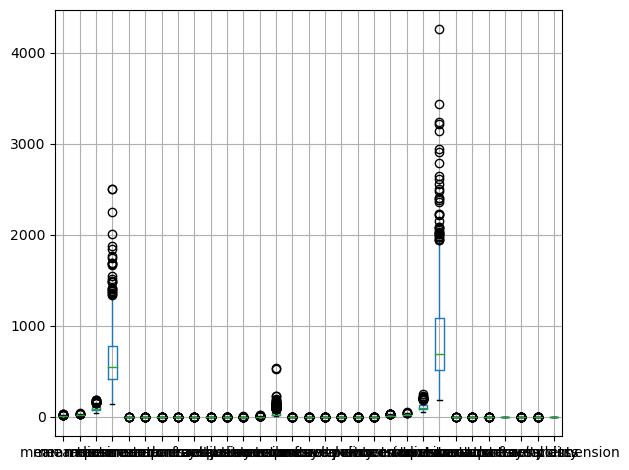

In [212]:
#데이터 간의 관계 >> 스케일링의 여부 확인 
#box_plot그리기 
cancer_df.boxplot()
plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

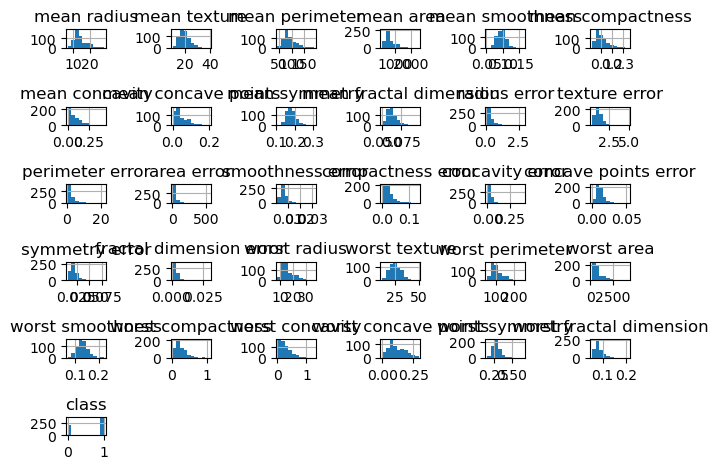

In [213]:
#히스토그램 
plt.figure(figsize=(15,5))
cancer_df.hist()
plt.tight_layout()
plt.show()

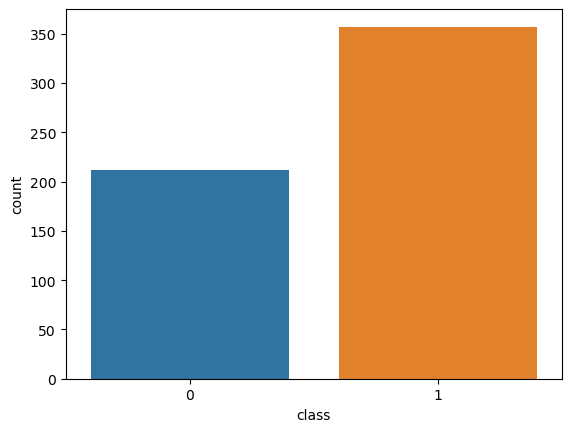

In [214]:
sns.countplot(x=cancer_df['class']) #resampling필요
plt.show()

In [ ]:
sns.pairplot(cancer_df)
plt.show()

In [ ]:
sns.heatmap(cancer_df.corr(), annot=True )
plt.show()

In [216]:
# 자료 나누기 
# x and y split; 
y = cancer_df['class']
x = cancer_df.drop('class', axis=1)
x
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: class, Length: 569, dtype: int32

In [218]:
#스케일링 필요; 
scaler = MinMaxScaler()
cancer_data_scaled = scaler.fit_transform(cancer_df)
cancer_data_scaled

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.59846245, 0.41886396,
        0.        ],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.23358959, 0.22287813,
        0.        ],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.40370589, 0.21343303,
        0.        ],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.12872068, 0.1519087 ,
        0.        ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.49714173, 0.45231536,
        0.        ],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.25744136, 0.10068215,
        1.        ]])

In [219]:
#train, test 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y
                                                    , test_size=.3 #테스트데이터 사이즈 지정
                                                    , random_state=3 #random 고정 
                                                    )
x_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
473,12.27,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,0.1701,0.05960,...,13.45,38.05,85.08,558.9,0.09422,0.05213,0.0000,0.00000,0.2409,0.06743
211,11.84,18.94,75.51,428.0,0.08871,0.06900,0.02669,0.01393,0.1533,0.06057,...,13.30,24.99,85.22,546.3,0.12800,0.18800,0.1471,0.06913,0.2535,0.07993
302,20.09,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,23.68,29.43,158.80,1696.0,0.13470,0.33910,0.4932,0.19230,0.3294,0.09469
369,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,0.06140,...,27.66,25.80,195.00,2227.0,0.12940,0.38850,0.4756,0.24320,0.2741,0.08574
434,14.86,16.94,94.89,673.7,0.08924,0.07074,0.03346,0.02877,0.1573,0.05703,...,16.31,20.54,102.30,777.5,0.12180,0.15500,0.1220,0.07971,0.2525,0.06827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,12.16,18.03,78.29,455.3,0.09087,0.07838,0.02916,0.01527,0.1464,0.06284,...,13.34,27.87,88.83,547.4,0.12080,0.22790,0.1620,0.05690,0.2406,0.07729
422,11.61,16.02,75.46,408.2,0.10880,0.11680,0.07097,0.04497,0.1886,0.06320,...,12.64,19.67,81.93,475.7,0.14150,0.21700,0.2302,0.11050,0.2787,0.07427
119,17.95,20.01,114.20,982.0,0.08402,0.06722,0.07293,0.05596,0.2129,0.05025,...,20.58,27.83,129.20,1261.0,0.10720,0.12020,0.2249,0.11850,0.4882,0.06111
256,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,0.1893,0.06232,...,25.05,36.27,178.60,1926.0,0.12810,0.53290,0.4251,0.19410,0.2818,0.10050


In [220]:
#resample 
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler()
x_rus, y_rus = rus.fit_resample(x_train, y_train)

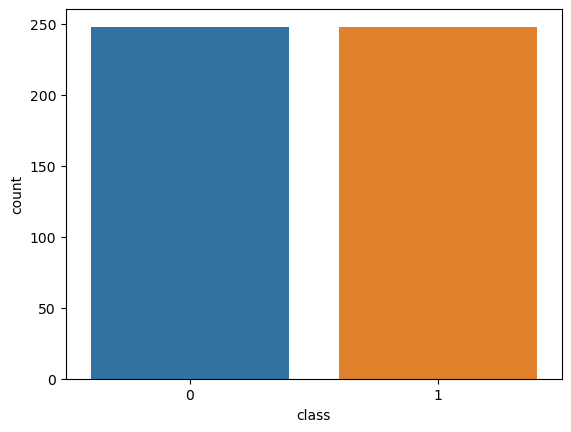

In [223]:
sns.countplot(x=y_rus) #resampling필요
plt.show()

In [224]:
#build logistic regression, dt, rf, lda, knn, svm >> 6가지 모델 구축 비교 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
model_lst = [LogisticRegression (), DecisionTreeClassifier(), RandomForestClassifier(),LinearDiscriminantAnalysis(), KNeighborsClassifier(), SVC()]

In [225]:
score_lst = []
cv_lst = []
for model in model_lst:
    model.fit(x_rus, y_rus)
    score_lst.append(model.score(x_test, y_test))
    cv_lst.append(cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy'))

C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [226]:
score_lst

[0.9473684210526315,
 0.9590643274853801,
 0.9532163742690059,
 0.9707602339181286,
 0.8888888888888888,
 0.9122807017543859]

In [244]:
# accuray_score 높은 알고리즘
#pd.DataFrame(score_lst, index=name_lst) #score_lst, index=name_lst : model들은 각각 class로 저장되어있으며, 해당 데이터 이름 추출 함수 

NameError: name 'name_lst' is not defined

In [239]:
cv_df = pd.DataFrame(cv_lst,index=['log', 'DT', 'RF', 'LDA', 'KNN', 'SVC']).T
cv_df.mean()

log    0.923856
DT     0.929739
RF     0.929739
LDA    0.935621
KNN    0.906209
SVC    0.906209
dtype: float64

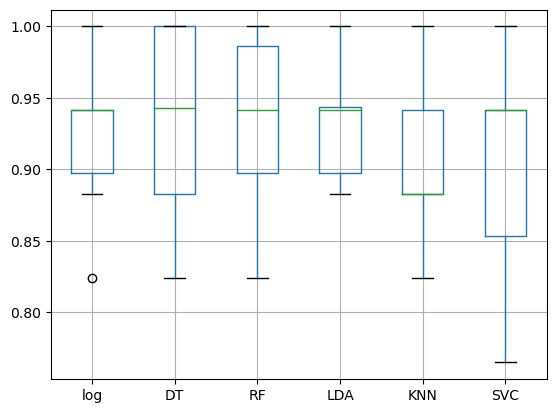

In [238]:
cv_df.boxplot()
plt.show()

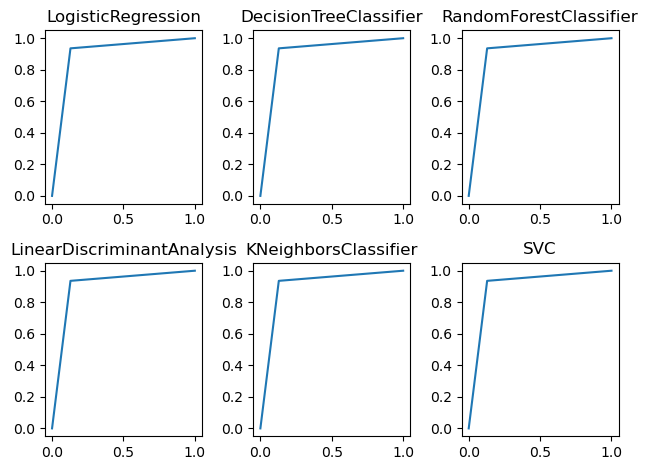

In [248]:
# Roc-curve 
model1_names = [x.__class__.__name__ for x in model_lst]
for i in range(len(model_lst)):
    model.fit(x_rus, y_rus)
    y_pred = model.predict(x_test)
    fpr, tpr, thres =  roc_curve(y_test, y_pred)
    plt.subplot(2,3,i+1) 
    plt.plot(fpr, tpr)
    plt.title(model1_names[i])
plt.tight_layout()
plt.show()

In [ ]:
#subplot과 다른 방법으로 그림 나누기 >> subplots; matrix, 2차원>> nested_loop필요
fig, axs = plt.subplots(6)
for i in range(len(model_lst)):
    model = model_lst[i]
    model.fit(x_rus, y_rus)
    y_pred = model.predict(x_test)
    plot_

In [ ]:
#acc 높은 알고리즘: LDA
#cv 높은 알고리즘:  LDA
#roc curve 정확도 높은 알고리즘 